In [1]:
import pandas as pd 
from scipy.signal import correlate
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import sys
import os
data_path = os.path.abspath('../data')
sys.path.append(data_path)

models_path = os.path.abspath('../models')
sys.path.append(models_path)

import age_from_reviews
import correlations

from sklearn.cluster import KMeans
import scipy.stats


In [2]:
reviews_path = "/Users/marijazelic/Downloads/reviews_df.csv"
users_path = "/Users/marijazelic/Downloads/users.csv"

path_data = "/Users/marijazelic/ada-2024-project-adavengers/"

users_reviews = age_from_reviews.AgeFromReviews(users_path, reviews_path)
voting_data_merged = correlations.merge_voting_by_years(path_data)
#us_users_reviews = users_reviews.filter_beer_type()


In [3]:
interpolate_data = correlations.interpolate_votes(voting_data_merged)

   pop18_29_democrat_2004  pop18_29_democrat_2005  pop18_29_democrat_2006  \
0                0.742268                0.752577                0.762887   

   pop18_29_democrat_2007  pop18_29_democrat_2008  pop18_29_democrat_2009  \
0                0.773196                0.783505                0.773196   

   pop18_29_democrat_2010  pop18_29_democrat_2011  pop18_29_democrat_2012  \
0                0.762887                0.752577                0.742268   

   pop18_29_democrat_2013  ...  pop18_29_republican_2007  \
0                0.743543  ...                  0.226804   

   pop18_29_republican_2008  pop18_29_republican_2009  \
0                  0.216495                  0.226804   

   pop18_29_republican_2010  pop18_29_republican_2011  \
0                  0.237113                  0.247423   

   pop18_29_republican_2012  pop18_29_republican_2013  \
0                  0.257732                  0.256457   

   pop18_29_republican_2014  pop18_29_republican_2015  \
0           

In [4]:
interpolate_data

,pop18_29_democrat_2004,pop18_29_democrat_2005,pop18_29_democrat_2006,pop18_29_democrat_2007,pop18_29_democrat_2008,pop18_29_democrat_2009,pop18_29_democrat_2010,pop18_29_democrat_2011,pop18_29_democrat_2012,pop18_29_democrat_2013,...,pop45_64_republican_2007,pop45_64_republican_2008,pop45_64_republican_2009,pop45_64_republican_2010,pop45_64_republican_2011,pop45_64_republican_2012,pop45_64_republican_2013,pop45_64_republican_2014,pop45_64_republican_2015,pop45_64_republican_2016
state,,,,,,,,,,,,,,,,,,,,,
New York,0.742268,0.752577,0.762887,0.773196,0.783505,0.773196,0.762887,0.752577,0.742268,0.743543,...,0.421717,0.404040,0.398990,0.393939,0.388889,0.383838,0.399858,0.415878,0.431897,0.447917
California,0.597938,0.640373,0.682807,0.725242,0.767677,0.756880,0.746083,0.735287,0.724490,0.728761,...,0.387755,0.387755,0.406978,0.426201,0.445424,0.464646,0.450047,0.435448,0.420849,0.406250
New Hampshire,0.570000,0.583112,0.596224,0.609337,0.622449,0.628295,0.634141,0.639987,0.645833,0.620486,...,0.446970,0.434343,0.452020,0.469697,0.487374,0.505051,0.510231,0.515412,0.520593,0.525773
Wisconsin,0.581633,0.597841,0.614049,0.630257,0.646465,0.639488,0.632511,0.625534,0.618557,0.593038,...,0.441919,0.424242,0.439394,0.454545,0.469697,0.484848,0.507966,0.531084,0.554202,0.577320
Iowa,0.535354,0.558732,0.582110,0.605488,0.628866,0.617483,0.606100,0.594716,0.583333,0.554167,...,0.462997,0.448980,0.454082,0.459184,0.464286,0.469388,0.490062,0.510736,0.531409,0.552083
Nevada,0.571429,0.599490,0.627551,0.655612,0.683673,0.686224,0.688776,0.691327,0.693878,0.669833,...,0.489508,0.474227,0.480670,0.487113,0.493557,0.500000,0.518617,0.537234,0.555851,0.574468
Pennsylvania,0.606061,0.617045,0.628030,0.639015,0.650000,0.648214,0.646429,0.644643,0.642857,0.618985,...,0.459082,0.438776,0.457870,0.476964,0.496058,0.515152,0.520384,0.525617,0.530850,0.536082
Virginia,0.540000,0.556515,0.573030,0.589545,0.606061,0.611762,0.617463,0.623165,0.628866,0.621649,...,0.501136,0.484848,0.497475,0.510101,0.522727,0.535354,0.530381,0.525409,0.520436,0.515464
Ohio,0.571429,0.585788,0.600147,0.614507,0.628866,0.632364,0.635862,0.639359,0.642857,0.619240,...,0.478485,0.464646,0.478587,0.492527,0.506468,0.520408,0.536139,0.551871,0.567602,0.583333


In [19]:
state = voting_data_merged.loc['New York']
indexes = state.index
list_fragments = ['pop18_29_democrat_2004', 'pop18_29_democrat_2008', 'pop18_29_democrat_2012', 'pop18_29_democrat_2016']
timepoints = state.loc[list_fragments]
years = [2004, 2008, 2012, 2016]
series = pd.Series(data=timepoints.values, index=years)
all_years = range(min(years), max(years)+1)
interpolated = series.reindex(all_years).interpolate(method='linear')

In [24]:
republican = 1 - interpolated
republican

2004    0.257732
2005    0.247423
2006    0.237113
2007    0.226804
2008    0.216495
2009    0.226804
2010    0.237113
2011    0.247423
2012    0.257732
2013    0.256457
2014    0.255182
2015    0.253907
2016    0.252632
dtype: float64

In [3]:
year_list = [2004, 2008, 2012, 2016]
results = users_reviews.aggregate_preferences_year(year_list)

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto").fit(voting_data_merged)
states = voting_data_merged.index
cluster_labels = kmeans.labels_
state_clusters = dict(zip(states, cluster_labels))
print(state_clusters)

{'New York': 2, 'California': 2, 'New Hampshire': 0, 'Wisconsin': 0, 'Iowa': 0, 'Nevada': 0, 'Pennsylvania': 0, 'Virginia': 0, 'Ohio': 0, 'Florida': 0, 'North Carolina': 0, 'Arizona': 0, 'Indiana': 1, 'Georgia': 1, 'South Carolina': 1, 'Kentucky': 1, 'Texas': 1}


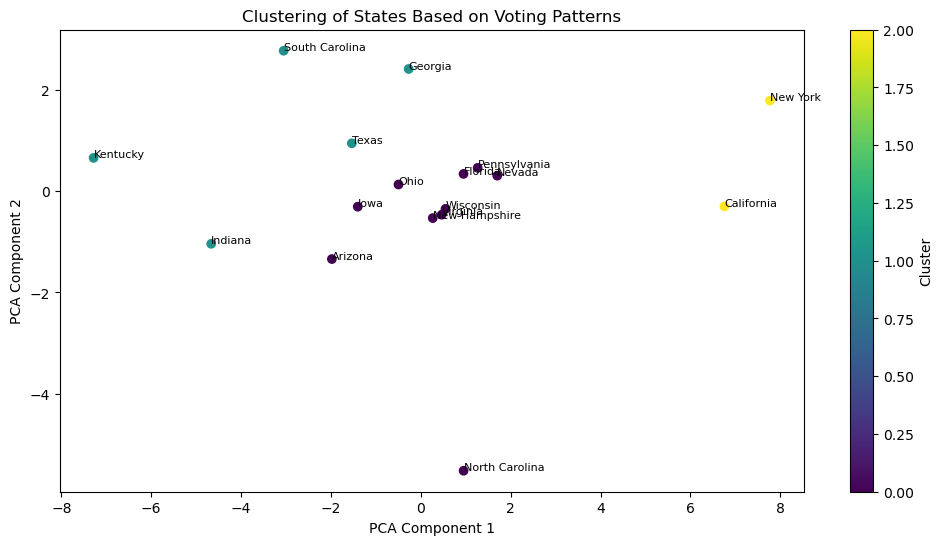

In [14]:
# We need to visualized states 
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(voting_data_merged)

plt.figure(figsize=(12,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
for i, state in enumerate(states):
    plt.text(reduced_data[i, 0], reduced_data[i, 1], state, fontsize=8)
plt.title("Clustering of States Based on Voting Patterns")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [25]:
kmeans = KMeans(n_clusters=2, n_init="auto").fit(results[['Lager_2004', 'Lager_2008', 'IPA_2012', 'IPA_2016']])
states = voting_data_merged.index
cluster_labels = kmeans.labels_
state_clusters = dict(zip(states, cluster_labels))
print(state_clusters)

{'New York': 0, 'California': 1, 'New Hampshire': 0, 'Wisconsin': 1, 'Iowa': 1, 'Nevada': 0, 'Pennsylvania': 1, 'Virginia': 0, 'Ohio': 1, 'Florida': 1, 'North Carolina': 1, 'Arizona': 1, 'Indiana': 1, 'Georgia': 0, 'South Carolina': 1, 'Kentucky': 1, 'Texas': 1}


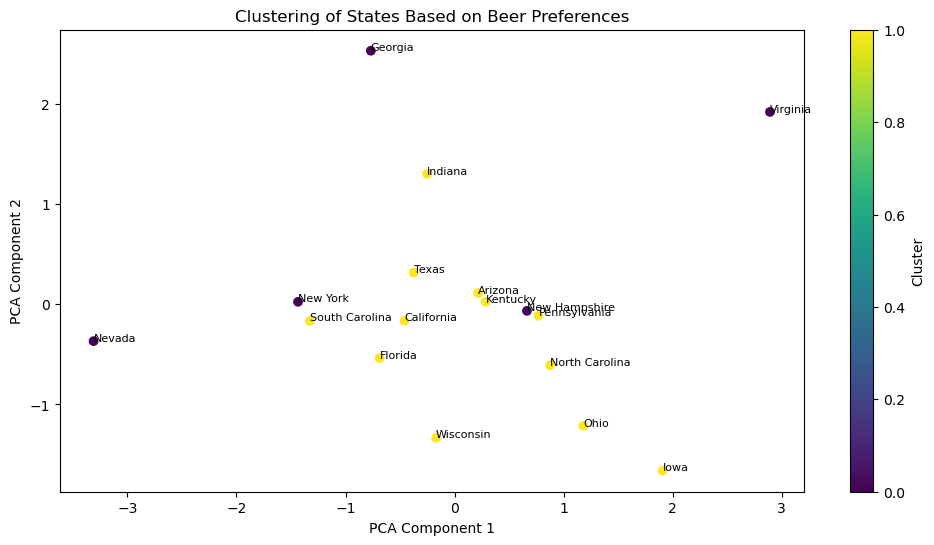

In [26]:
# We need to visualized states 
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(results[['IPA_2004', 'IPA_2008', 'IPA_2012', 'IPA_2016']])

plt.figure(figsize=(12,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
for i, state in enumerate(states):
    plt.text(reduced_data[i, 0], reduced_data[i, 1], state, fontsize=8)
plt.title("Clustering of States Based on Beer Preferences")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, n_init="auto").fit()
states = voting_data_merged.index
cluster_labels = kmeans.labels_
state_clusters = dict(zip(states, cluster_labels))
print(state_clusters)

In [31]:
state_1 = 'New York'
state_2 = 'California'

print(f"Calculating correlations between {state_1} and {state_2}.")
styles = ['IPA', 'Lager', 'Other Ale', 'Pale Ale', 'Pilsner', 'Porter', 'Red/Amber Ale']
for style in styles:
    style_years = [f"{style}_{year}" for year in year_list]

    beer_pref_1 = results.loc[state_1][style_years]
    beer_pref_2 = results.loc[state_2][style_years]
    
    pearsoncorr = scipy.stats.pearsonr(beer_pref_1, beer_pref_2)
    spearmancorr = scipy.stats.spearmanr(beer_pref_1, beer_pref_2)
    print(f"For {style} Pearson correlation coefficient is: {pearsoncorr}." )
    print(f"For {style} Spearman correlation coefficient is: {spearmancorr}." )


Calculating correlations between New York and California.
For IPA Pearson correlation coefficient is: PearsonRResult(statistic=0.950268094506743, pvalue=0.04973190549325701).
For IPA Spearman correlation coefficient is: SignificanceResult(statistic=1.0, pvalue=0.0).
For Lager Pearson correlation coefficient is: PearsonRResult(statistic=-0.37209349400240344, pvalue=0.6279065059975966).
For Lager Spearman correlation coefficient is: SignificanceResult(statistic=-0.39999999999999997, pvalue=0.6).
For Other Ale Pearson correlation coefficient is: PearsonRResult(statistic=-0.6184681336836139, pvalue=0.381531866316386).
For Other Ale Spearman correlation coefficient is: SignificanceResult(statistic=-0.39999999999999997, pvalue=0.6).
For Pale Ale Pearson correlation coefficient is: PearsonRResult(statistic=0.6768051564239229, pvalue=0.323194843576077).
For Pale Ale Spearman correlation coefficient is: SignificanceResult(statistic=0.39999999999999997, pvalue=0.6).
For Pilsner Pearson correlati

In [20]:
styles = ['IPA', 'Lager', 'Other Ale', 'Pale Ale', 'Pilsner', 'Porter', 'Red/Amber Ale']
votings = ['pop18_29_democrat', 'pop18_29_republican', 'pop30_44_democrat', 'pop30_44_republican', 'pop45_64_democrat', 'pop45_64_republican']

state = 'Arizona'
for style in styles:
    for vote in votings:
        
        # Add year
        style_years = [f"{style}_{year}" for year in year_list]
        vote_years = [f"{vote}_{year}" for year in year_list]
        
        # Create respective data for cross-correlation
        beer_pref = results.loc[state][style_years]
        voting_pref = voting_data_merged.loc[state][vote_years]
        
        correlation = correlate(beer_pref, voting_pref, mode='full')
        n = len(beer_pref)  # Length of the original series

        normalized_cross_corr = correlation / n
        
        # Printing
        print(f"Beer style: {style}")
        print(f"Vote pattern: {vote}")
        print(f"Correlation: {normalized_cross_corr}")

Beer style: IPA
Vote pattern: pop18_29_democrat
Correlation: [ 0.09773368 -0.01689804 -0.47847532  0.0666415   0.74466648 -0.20020642
 -0.20000349]
Beer style: IPA
Vote pattern: pop18_29_republican
Correlation: [-0.09773368  0.01689804  0.47847532 -0.0666415  -0.74466648  0.20020642
  0.20000349]
Beer style: IPA
Vote pattern: pop30_44_democrat
Correlation: [ 0.01599821 -0.69990931  1.02771978 -0.29643478  0.30372159 -0.13500315
 -0.17880762]
Beer style: IPA
Vote pattern: pop30_44_republican
Correlation: [-0.01599821  0.69990931 -1.02771978  0.29643478 -0.30372159  0.13500315
  0.17880762]
Beer style: IPA
Vote pattern: pop45_64_democrat
Correlation: [-0.14918633 -0.19331616  0.50975174  0.00866835  0.10755854 -0.14930958
 -0.10085448]
Beer style: IPA
Vote pattern: pop45_64_republican
Correlation: [ 0.14918633  0.19331616 -0.50975174 -0.00866835 -0.10755854  0.14930958
  0.10085448]
Beer style: Lager
Vote pattern: pop18_29_democrat
Correlation: [-0.17078715 -0.23548785  0.48384976  0.700

In [15]:
IPA_2004_A = results.loc['Arizona'][['IPA_2004', 'IPA_2008', 'IPA_2012', 'IPA_2016']]
voting_pref_A = voting_data_merged.loc['Arizona'][['pop18_29_republican_2004', 'pop18_29_republican_2008', 'pop18_29_republican_2012', 'pop18_29_republican_2016']]


In [16]:
IPA_2004_A

IPA_2004    1.335815
IPA_2008   -2.280013
IPA_2012    0.270455
IPA_2016    0.630764
Name: Arizona, dtype: float64

In [17]:
voting_pref_A

pop18_29_republican_2004    1.268326
pop18_29_republican_2008    0.725788
pop18_29_republican_2012   -0.448916
pop18_29_republican_2016   -0.292656
Name: Arizona, dtype: float64

In [18]:
correlation = correlate(IPA_2004_A, voting_pref_A, mode='full')
n = len(IPA_2004_A)  # Length of the original series
std_x = IPA_2004_A.std()
std_y = voting_pref_A.std()
normalized_cross_corr = correlation / (n * std_x * std_y)

In [19]:
normalized_cross_corr

array([-0.07537023,  0.01303142,  0.36899045, -0.05139257, -0.57427167,
        0.15439512,  0.15423863])

In [35]:
gc_res = grangercausalitytests(merged_df, 0)

ValueError: maxlag must be a positive integer